<a href="https://colab.research.google.com/github/Fridayy12/Feature_Detection_Algorithms/blob/main/py_ntbk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Imports

In [ ]:
!pip install opencv-python opencv-contrib-python matplotlib numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png -O box.png
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box_in_scene.png -O box_in_scene.png
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/blox.jpg -O blox.jpg

--2025-04-08 17:39:16--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘box.png’

box.png             100%[===================>]  49.54K  --.-KB/s    in 0.01s   

2025-04-08 17:39:16 (3.72 MB/s) - ‘box.png’ saved [50728/50728]

--2025-04-08 17:39:16--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box_in_scene.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122490 (120K) [image/png]
Saving to: 

SIFT Feature Matching Implementation

SIFT Feature Matching Results:


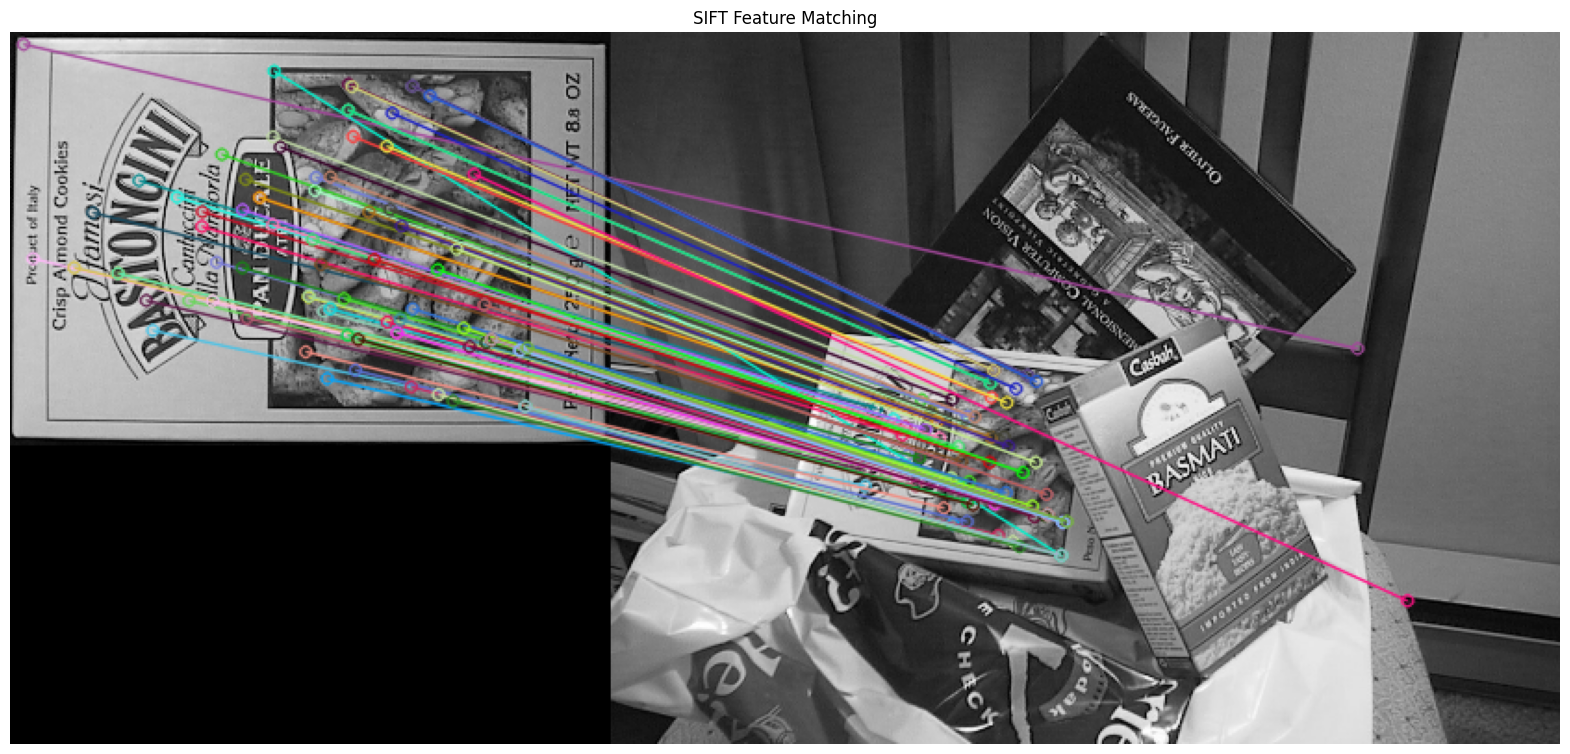

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def sift_feature_matching(img1_path, img2_path):

    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)


    sift = cv2.SIFT_create()


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)


    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)


    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])


    img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)


    plt.figure(figsize=(20,10))
    plt.imshow(img_matches)
    plt.axis('off')
    plt.title('SIFT Feature Matching')
    plt.show()


    cv2.imwrite('sift_matches.jpg', img_matches)
    files.download('sift_matches.jpg')


print("SIFT Feature Matching Results:")
sift_feature_matching('box.png', 'box_in_scene.png')

Harris Corner Detection Implementation

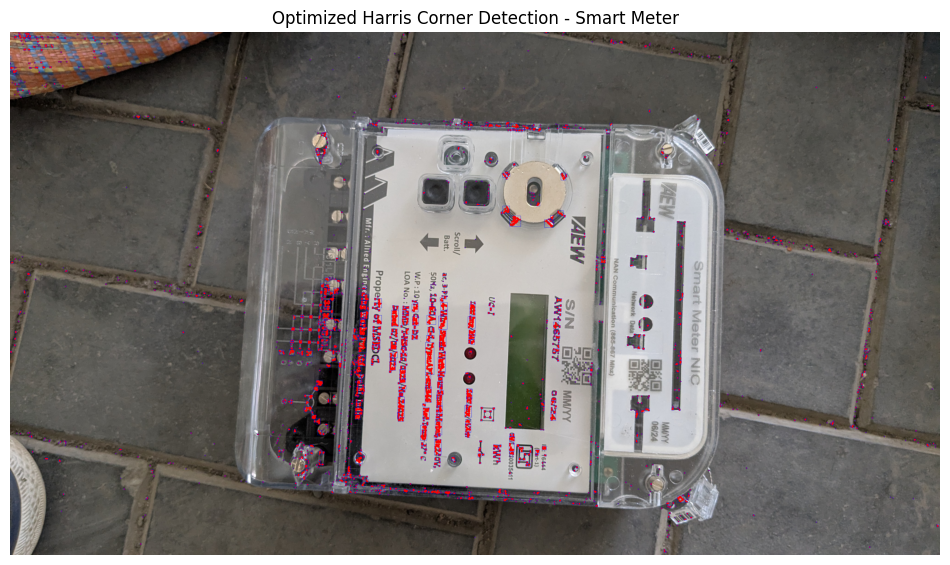

Output saved to meter_corners_optimized.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def optimized_harris_corner_meter(img_path):

    img = cv2.imread("/content/PXL_20250303_072101088.MP.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    gray = cv2.equalizeHist(gray)


    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,
                          blockSize=5,
                          ksize=5,
                          k=0.04)


    dst = cv2.dilate(dst, None)


    corner_threshold = 0.02 * dst.max()
    img[dst > corner_threshold] = [0, 0, 255]


    ret, dst_thresh = cv2.threshold(dst, corner_threshold, 255, 0)
    dst_thresh = np.uint8(dst_thresh)
    contours, _ = cv2.findContours(dst_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 1)


    plt.figure(figsize=(12,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Optimized Harris Corner Detection - Smart Meter')
    plt.show()


    output_path = 'meter_corners_optimized.jpg'
    cv2.imwrite(output_path, img)
    print(f"Output saved to {output_path}")


optimized_harris_corner_meter('PXL_20250303_072101088.MP.jpg')

RANSAC for Outlier Removal Implementation


RANSAC Feature Matching Results:


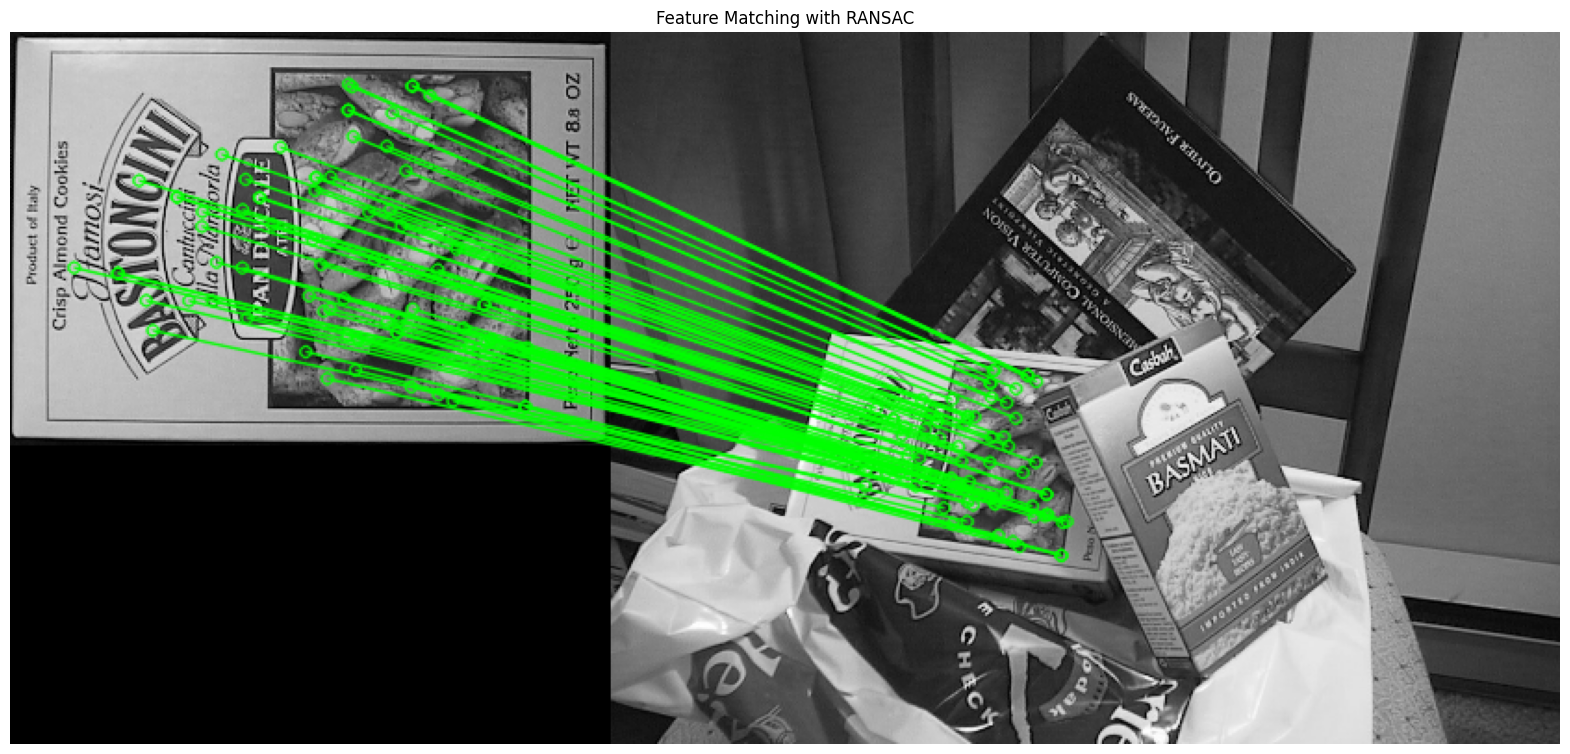

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def ransac_feature_matching(img1_path, img2_path):

    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)


    sift = cv2.SIFT_create()


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)


    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)


    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)


    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)


    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()


    draw_params = dict(matchColor=(0,255,0),
                      singlePointColor=None,
                      matchesMask=matchesMask,
                      flags=2)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)


    plt.figure(figsize=(20,10))
    plt.imshow(img_matches)
    plt.axis('off')
    plt.title('Feature Matching with RANSAC')
    plt.show()

    cv2.imwrite('ransac_matches.jpg', img_matches)
    files.download('ransac_matches.jpg')


print("\nRANSAC Feature Matching Results:")
ransac_feature_matching('box.png', 'box_in_scene.png')